# TASK 2 CUSTOMER SEGMENTATION :
  

# DATA CLEANING :
- importing libraries
- checking for outliers 
- checking for unique columns 
- categorizing columns 
- standard deviation which helps us to segregate the data more effectively 

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go

In [9]:
df=pd.read_csv("ifood_df (1).csv")

In [10]:
#reading the data 
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [11]:
df.shape 

(2205, 39)

In [12]:
df.info

<bound method DataFrame.info of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                

FINDING NULL VALUES 

In [13]:
df.isnull().sum()
# there is no null value in the dataset 

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

FINDING UNIQUE VALUES IN THE DATASET
- we need to find all the not unique columns 
- if the colums consist of duplicates then we shall drop those columns

In [14]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [15]:
#the Z_CostContact,Z_Revenue consist of same values except 1 value
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [16]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

# NUMERICAL COLUMNS

In [17]:
# by segmenting the columns we can calculate the mean purchase as well as frequency value from the dataset
df.columns
num_col=[]
for col in df.columns:
    if(df[col].dtypes != 'objects'):
        num_col.append(col)
print(num_col)        

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']


In [18]:
df.columns
cat_col=[]
for col in df.columns:
    if(df[col].dtypes =='objects'):
        cat_col.append(col)
print(cat_col)
# all the columns are numeric 

[]


# STATISTICS

In [19]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [20]:
sns.pairplots(data=df,hue'MntTotal')

SyntaxError: positional argument follows keyword argument (31729510.py, line 1)

# DATA EXPLORATORY AND DISCRIPTIVE STATISTICS
- EXPLORATION ACCROSS TOTAL AMOUNT OF PRODUCTS AND CUSTOMER EDUCATION STATUS[FEATURE ENGINEERING]
- EXPLORATION ACCROSS FREQUENCY AND  AGE 
- EXPLORATION ACCROSS FREQUENCY AND INCOME
- CALCULATION OF MARTIAL STATUS [FEATURE ENGINEERING]
- CALCULATION OF AVEGRAGE NUMBER OF CUSTOMER WHO BOUGHT PRODUCTS BASED ON THERE INCOME

In [21]:
#calculation of education 
def education (row):
    if row['education_2n Cycle']== 1:
        return 'education_2n Cycle'
    elif row['education_Basic']== 1:
        return 'education_Basic'
    elif row['education_Graduation']==1:
        return 'education_Graduation'
    elif row['education_Master']==1:
        return 'education_Master'
    elif row['education_PhD']==1:
        return 'education_PhD'
    else:
        return 'Unknown'
df['EDUCATION']=df.apply(education,axis=1)

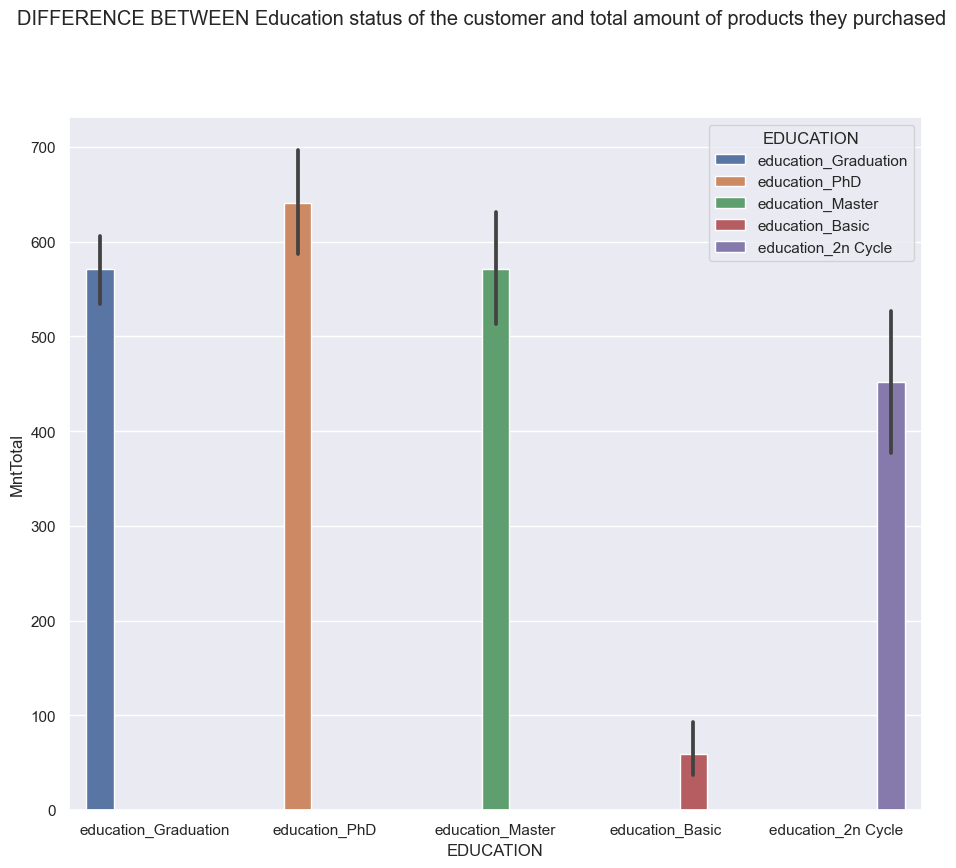

In [22]:
plt.figure(figsize=(11,9))
sns.barplot(x='EDUCATION',y='MntTotal',hue='EDUCATION',data=df)
plt.suptitle("DIFFERENCE BETWEEN Education status of the customer and total amount of products they purchased",y=1)
plt.show()

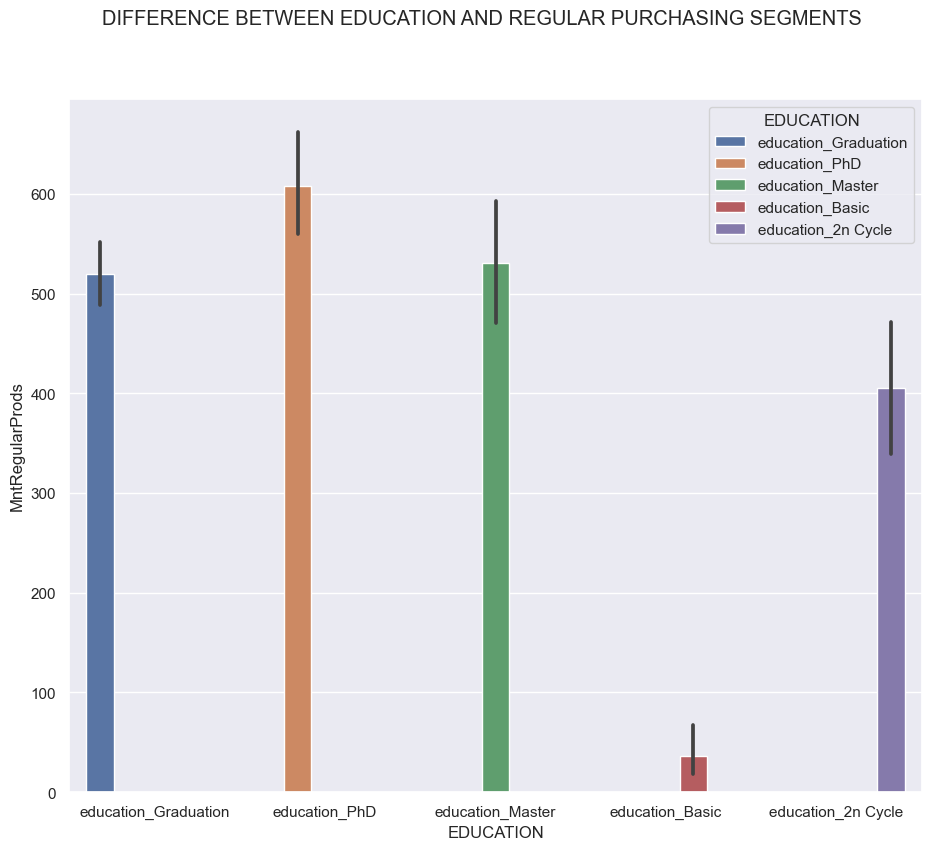

In [23]:
# we can also provide the difference between the common purchasement done by the students 
plt.figure(figsize=(11,9))
sns.barplot(x='EDUCATION',y='MntRegularProds',hue="EDUCATION",data=df)
plt.suptitle("DIFFERENCE BETWEEN EDUCATION AND REGULAR PURCHASING SEGMENTS")
plt.show()

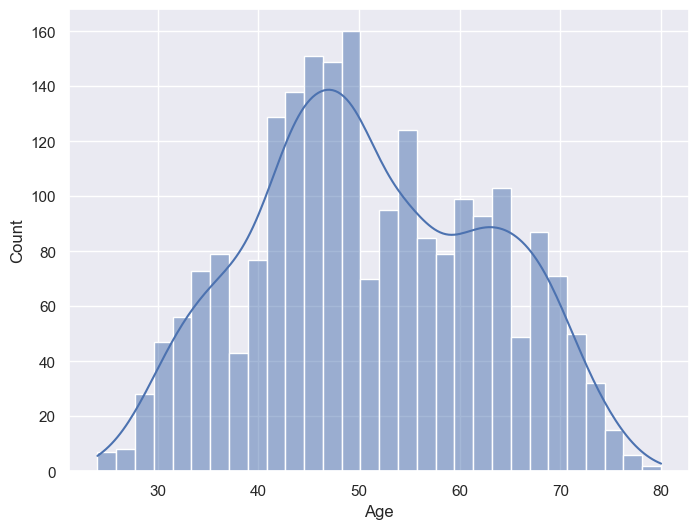

In [26]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.show()

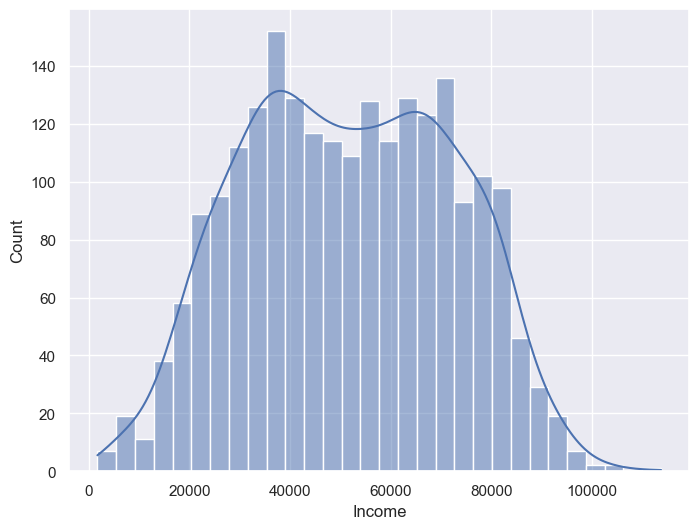

In [27]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='Income', bins=30, kde=True)
plt.show()

CUSTOMER WHO BOUGHT PRODUCTS IN TERMS OF THERE INCOME AND AGE
- Before we enter into plotting we need segregate customer based upon there martial status , whether it is for a kidhome or a     teenhome, what are the products which they have bought etc... which was provided by the company
- lets first do feature engineering bring a number of features into one column ex:education

In [38]:
#MARTIAL STATUS CALCULATION
def martial(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
df['Martial'] = df.apply(martial, axis=1)

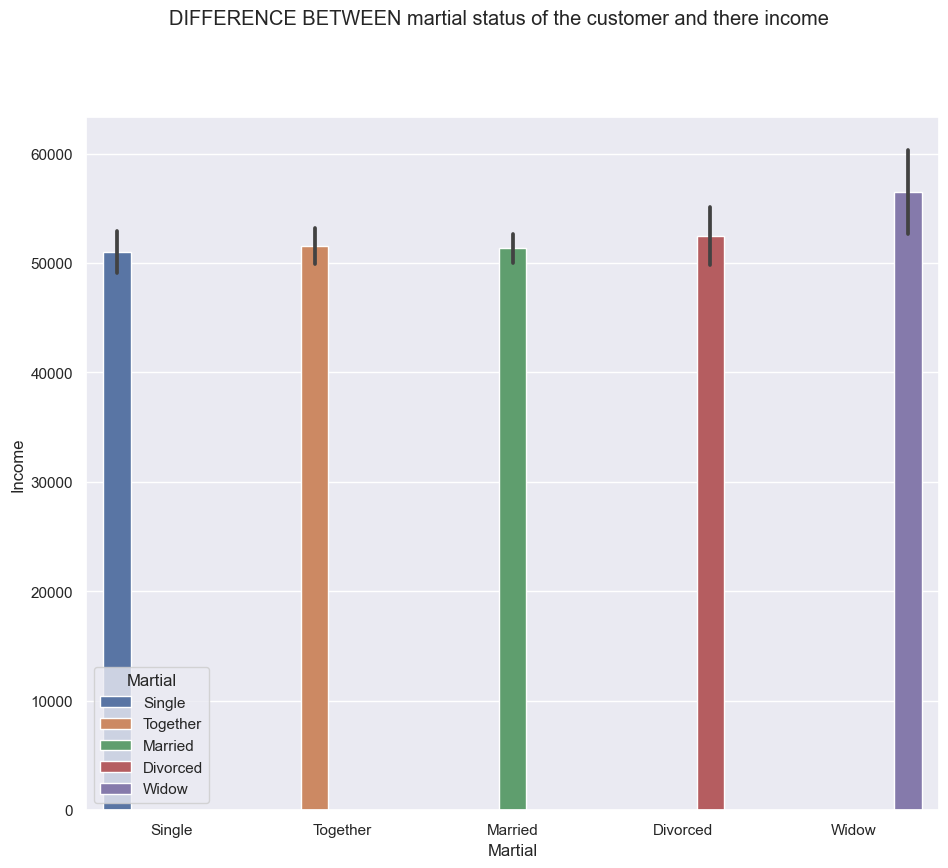

In [39]:
plt.figure(figsize=(11,9))
sns.barplot(x='Martial',y='Income',hue='Martial',data=df)
plt.suptitle("DIFFERENCE BETWEEN martial status of the customer and there income",y=1)
plt.show()

HOW ABOUT a projection OF children,income,age,the products

In [40]:
cols_initial=cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_EDUCATION=['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

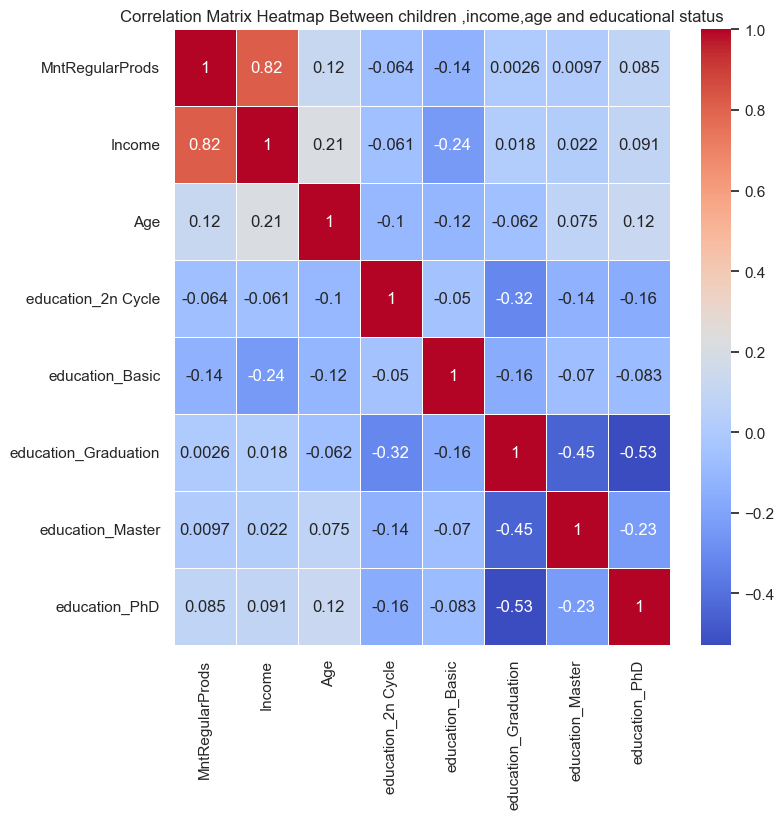

In [41]:
corr_matrix = df[['MntRegularProds']+cols_initial+cols_EDUCATION].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap Between children ,income,age and educational status')
plt.show()

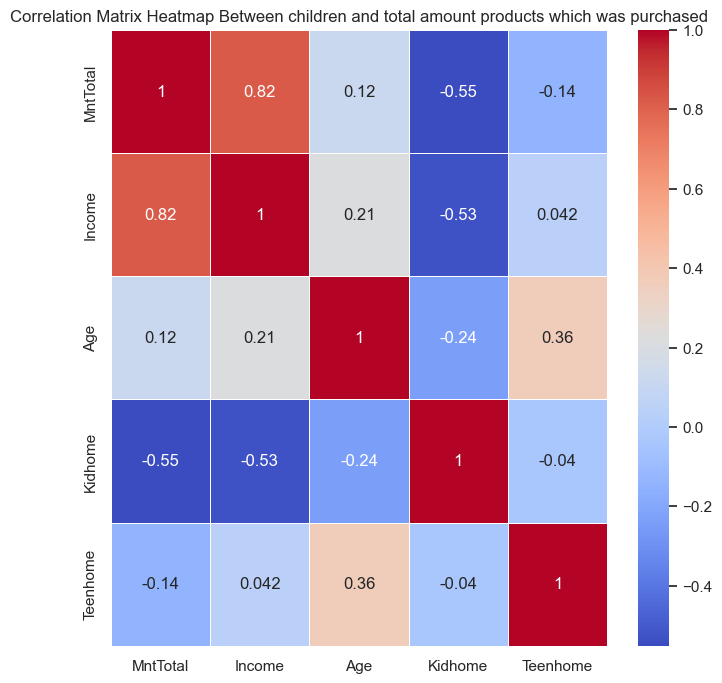

In [42]:
corr_matrix = df[['MntTotal']+cols_initial+cols_children].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap Between children and total amount products which was purchased')
plt.show()

# CUSTOMER SEGMENTATION AND VISUALIZATION[USING K-MEANS]

In [43]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
def relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['relationship'] = df.apply(relationship, axis=1)
df.head()    

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,EDUCATION,Martial,In_relationship,relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,1529,1441,0,education_Graduation,Single,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,21,15,0,education_Graduation,Single,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,734,692,0,education_Graduation,Together,1,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,48,43,0,education_Graduation,Together,1,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,407,392,0,education_PhD,Married,1,1


In [51]:
scaler = StandardScaler()
cols_clustering = ['Income', 'MntTotal', 'relationship']
df_scaled = df.copy()
df_scaled[cols_clustering] = scaler.fit_transform(df[cols_clustering])
df_scaled[cols_clustering].describe()

,Income,MntTotal,relationship
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,1.237672e-17,-5.865804e-17,-2.215411e-18
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.409272e+00,-9.704038e-01,-1.347625e+00
25%,-7.932106e-01,-8.800957e-01,-1.347625e+00
50%,-1.618161e-02,-3.816642e-01,7.420464e-01
75%,8.044529e-01,6.968235e-01,7.420464e-01
max,2.999363e+00,3.348757e+00,7.420464e-01


#PCA[PRINCIPLE COMPONENET ANALYSIS] IT TAKES THE ORGINAL FEATURE AND CREATE NEW FEATURES BASED UPON THE VARIANCE OF THE FEATURE

In [54]:
from sklearn import decomposition
time= decomposition.PCA(n_components = 2)
time_ca = time.fit_transform(df_scaled[cols_clustering])
df_scaled['pc1'] = time_ca[:,0]
df_scaled['pc2'] = time_ca[:,1]

In [60]:
x = df_scaled[cols_clustering]
intiallist = []
for K in range(2,10):
    intial = KMeans(n_clusters=K, random_state=7).fit(x).inertia_
    intiallist.append(intial)

C:\Users\Tanusree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


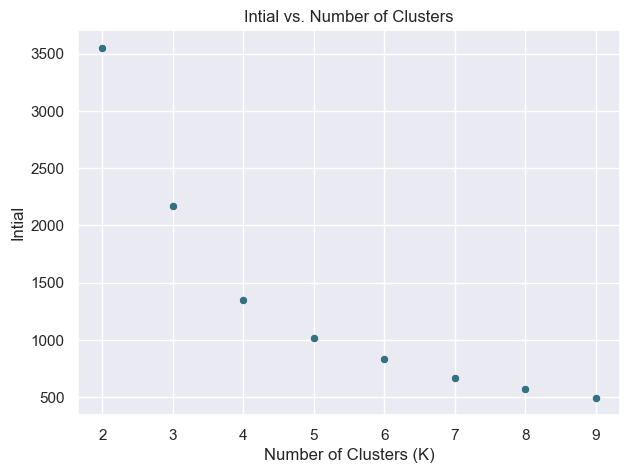

In [66]:
plt.figure(figsize=[7,5])
sns.scatterplot(range(2,10), intiallist, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Intial vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Intial")
plt.show()

C:\Users\Tanusree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


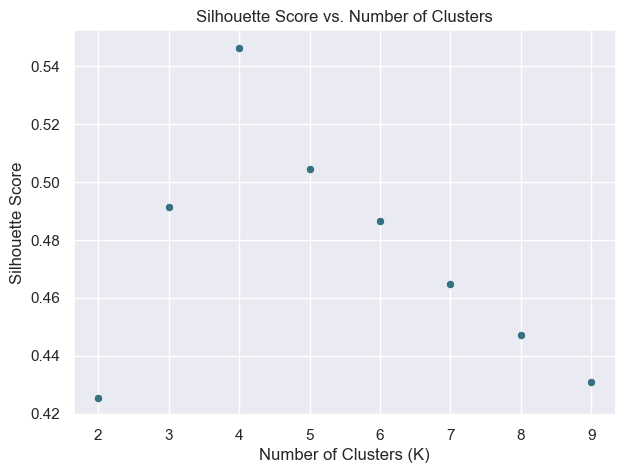

In [70]:
from sklearn.metrics import silhouette_score
silhouettelist = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(x)
    time_avg = silhouette_score(x, clusters)
    silhouettelist.append(time_avg)

plt.figure(figsize=[7,5])
sns.scatterplot(range(2,10), silhouettelist, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [71]:
model1 = KMeans(n_clusters=4, random_state = 7)
model1.fit(df_scaled[cols_clustering])
df_scaled['Cluster'] = model1.predict(df_scaled[cols_clustering])

# VISUALIZATION

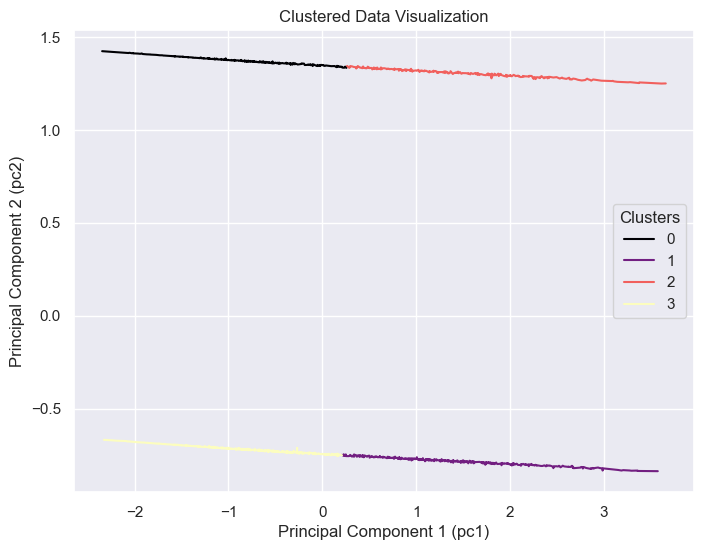

In [74]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='pc1', y='pc2', data=df_scaled, hue='Cluster', palette='magma')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

we need to find the mean values how to do that 
first we will taake a mean of all the columns we joined together for clustering MntTotal,relationship

In [75]:
df['Cluster'] = df_scaled.Cluster
df.groupby('Cluster')[cols_clustering].mean()

,Income,MntTotal,relationship
Cluster,,,
0,37332.339956,150.761589,0.0
1,71865.747350,1150.915194,1.0
2,72059.439394,1167.306061,0.0
3,37920.024533,158.845794,1.0


In [76]:
mnt = df.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
1,1,1150.915194,1080.148410,624.773852,52.750883,342.715548,75.738516,54.936396,70.766784
2,2,1167.306061,1092.893939,617.148485,55.324242,361.278788,77.703030,55.851515,74.412121
3,3,158.845794,134.119159,92.410047,7.660047,39.426402,11.417056,7.932243,24.726636


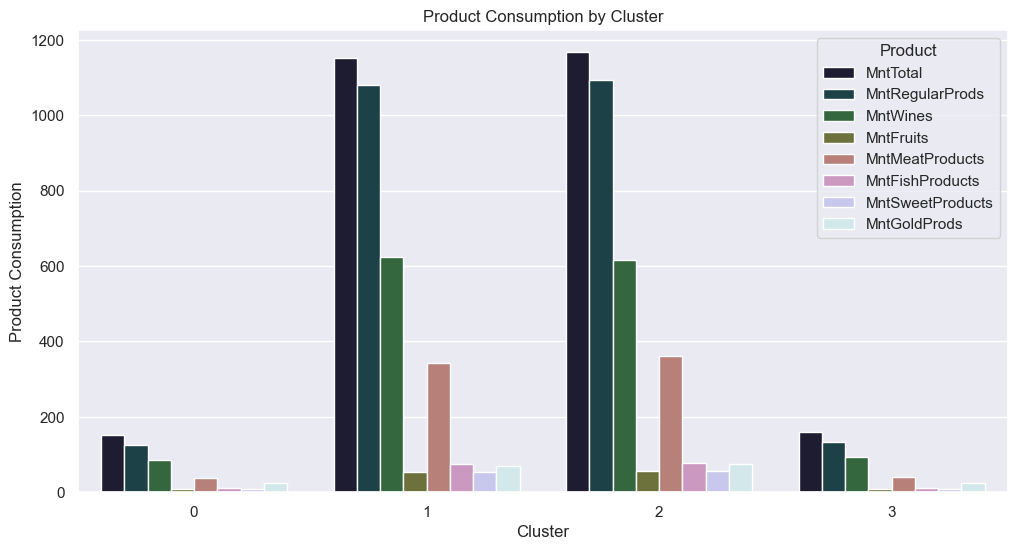

In [79]:
melted_data = pd.melt(mnt, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="cubehelix")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

Text(0.5, 1.0, 'Cluster sizes')

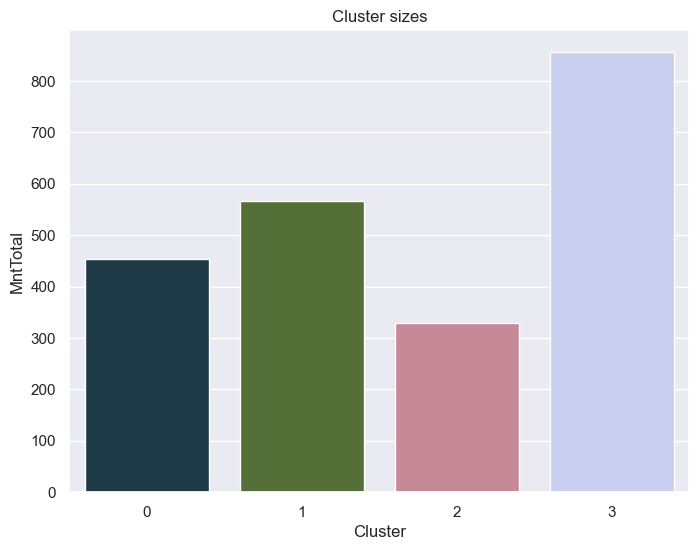

In [82]:
cluster_sizes = df.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'cubehelix')
plt.title('Cluster sizes')

Text(0.5, 1.0, 'Income by cluster')

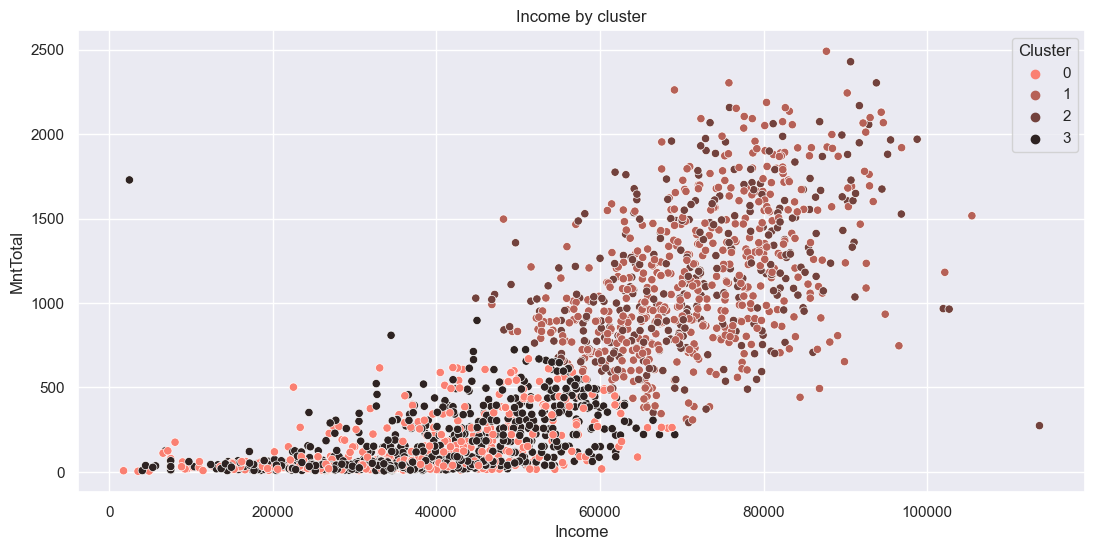

In [86]:
plt.figure(figsize=(13, 6))
sns.scatterplot(x='Income', y='MntTotal', data=df, hue = 'Cluster', palette='dark:salmon_r')
plt.title('Income by cluster')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


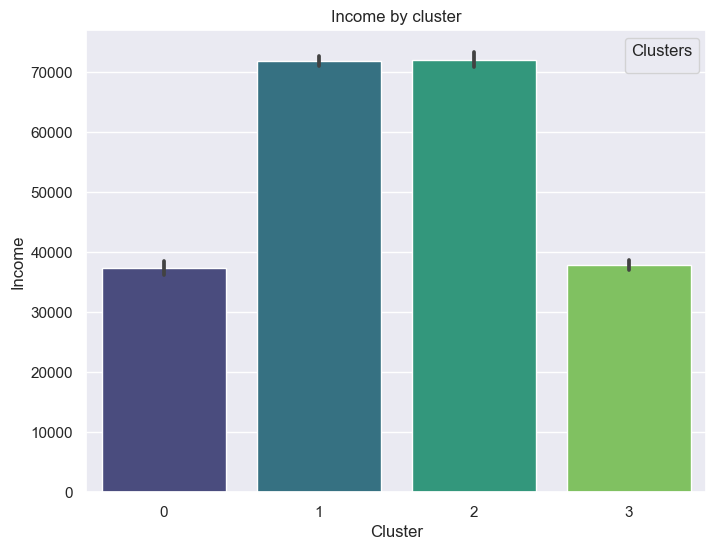

In [89]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Income', data=df, palette='viridis')
plt.title('Income by cluster')
plt.legend(title='Clusters')

Text(0, 0.5, 'relationship')

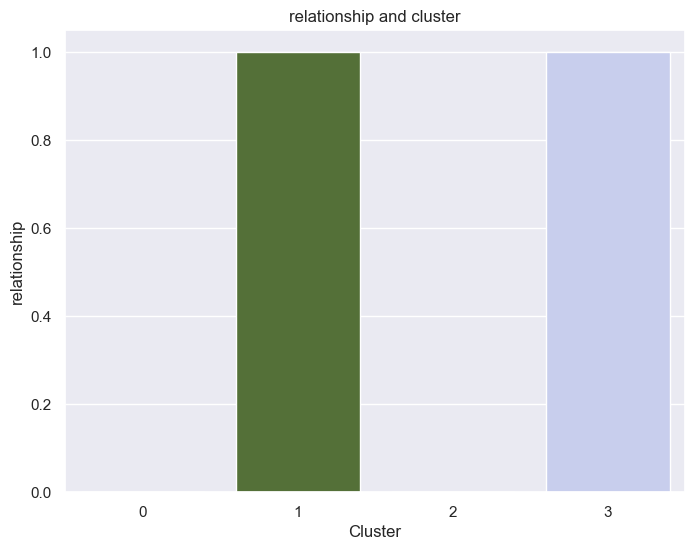

In [94]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='relationship', data=df, palette='cubehelix')
plt.title('relationship and cluster')
plt.xlabel('Cluster')
plt.ylabel('relationship')

# RECOMENDATION
- FROM THE GIVE CLUSTER WE CAN OBTAIN VARIOUS CALSSIFICATION SUCH AS :
CLUSTER 0: CUSTOMER'S WHO ARE MARRIED OR TOGETHER :
- THESE CUSTOMERS ARE TEND TO GET HIGH SALARY AND TERMED TO BE BUYING HIGH VALUE OF GOODS IN LARGE QUANTITY SUCH AS WINE AND       FRUITS 
CLUSTER 1:CUSTOMER WHO DOESN'T HAVE A REVENUE:
- CUSTOMER WHO DOESN'T HAVE A REVENUE SUCH AS CUSTOMER'S WHO DOES HAVE EDUCATIONAL BACKROUND .
- DISCOUNTS OR ANY OTHER COMMERCIAL ACTIVITIES CAN BRING IN MORE CUSTOMER'S
CLUSTER 3: HAVE LOWEST VALUE :
- IT IS AS PREVIOUS CLUSTER WE HAVE EXTABLISHED
THESE TWO ARE THE MAJOR FACTORS THAT IS ESTABLISHED FROM THE TWO CLUSTERS 